# General

## Group's information

**Group 02**

- 1753075 - Huynh Doan Minh Ngoc
- 1753074 - Nguyen Kim Ngan
- 1753086 - Tong Le Thien Phuc

## Project's information

**Topic: Credit Card Fraud Detection**

In today's developing society, we are trending towards a cashless society. According to World Payments Report, in 2016, there is a 10.1% increase in total non-cash transaction in comparision to the previous year. However, along with moving away from paying in cash, comes a huge problem: **Credit card fraud**. Even with EMV smart chips, we still suffered massive loss due to credit card fraud. Our project will try and build a model to prevent this crime and therefore limit the loss.

## Import libraries

In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

plt.style.use('ggplot')

# Dataset

## Kaggle dataset

In [2]:
df = pd.read_csv('creditcard.csv')

According to [https://www.kaggle.com/mlg-ulb/creditcardfraud]: 

The garthered dataset from Kaggle dataset contains 284,807 rows of data and 31 columns. Out of all the columns, the only ones that made the most sense were Time, Amount, and Class (fraud or not fraud). The other 28 columns were transformed using what seems to be a PCA dimensionality reduction in order to protect user identities.

- Time: Number of seconds elapsed between this transaction and the first transaction in the dataset.
- V1 - V28: Result of a PCA Dimensionality reduction to protect user identities and sensitive features
- Amount: Transaction amount
- Class: 1 for fraudulent transactions, 0 otherwise

The data itself is short in terms of time (it’s only 2 days long), and these transactions were made by European cardholders.

The datatype of Class attribute is int64, while datatype of other attributes are float64.

In [3]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
52294,45373.0,-0.404641,1.829298,-2.896526,1.728191,0.751352,-1.954853,-0.061071,0.661953,-0.298101,...,-0.143361,-0.411362,-0.012107,-0.469465,-0.361529,-0.360286,0.191568,-0.181713,1.00,0
257193,158047.0,1.987416,0.128298,-2.172227,1.110944,0.884338,-0.814837,0.770940,-0.368249,-0.037276,...,0.125253,0.285599,-0.049825,0.394707,0.474203,-0.499132,-0.049545,-0.052109,59.70,0
284513,172517.0,0.119225,0.625909,0.018752,-0.807711,0.642523,-0.307018,0.867567,-0.190325,0.377823,...,0.166851,0.718932,-0.187458,0.688035,0.031939,0.081678,-0.109334,-0.007698,18.39,0
91869,63663.0,-0.525772,0.864712,0.815513,0.726060,1.196290,1.342227,0.534479,0.129958,0.003803,...,-0.133895,0.009871,-0.396557,-1.711652,0.029663,-0.183639,-0.015289,-0.037630,2.49,0
241011,150844.0,-1.810983,0.186741,0.627387,-2.592124,-2.108083,0.271935,-1.546917,0.994493,-1.593207,...,0.028089,0.163747,-0.019846,0.566233,-0.431432,-0.355103,-0.985877,-0.278894,56.40,0
67288,52457.0,0.800632,-0.695180,0.178351,0.769166,-0.605204,-0.035301,-0.019530,0.178089,0.321476,...,-0.034557,-0.505330,-0.102110,0.008064,0.195006,0.259332,-0.065797,0.026743,191.31,0
44295,41880.0,1.233970,0.005673,-0.073121,-0.183386,0.085876,-0.135291,0.090679,-0.058649,-0.121108,...,-0.013405,0.165046,-0.129251,-0.164021,0.526075,1.149626,-0.076404,-0.021147,9.14,0
273274,165519.0,2.034896,-0.091119,-1.175147,0.211968,0.137982,-0.607890,0.083610,-0.161093,0.248977,...,-0.249496,-0.594069,0.290059,-0.385798,-0.287484,0.202833,-0.069385,-0.073329,1.29,0
196389,131482.0,-0.531795,0.245213,-0.499771,-0.380182,1.644246,0.112963,0.603881,-0.229368,0.540828,...,-0.041565,0.454061,0.453824,-1.001190,-2.479336,-0.045914,-0.079880,0.358457,1.79,0
232597,147231.0,1.033388,-2.700248,-2.450838,-0.430787,-0.848674,-0.788803,0.634253,-0.435596,-0.707322,...,0.572676,0.294575,-0.557033,-0.278497,0.055791,-0.104898,-0.180607,0.016985,625.00,0


In [4]:
#numerical summary -> only non-anonymized columns of interest
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


## Exploratory data analysis

### Time Distribution

Time Distribution of Credit Card Data


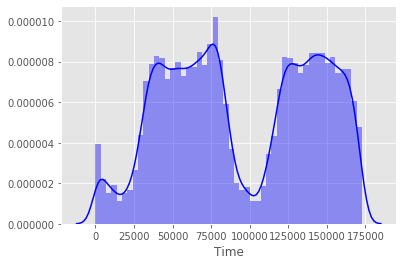

In [5]:
print("Time Distribution of Credit Card Data")
sns.distplot(df['Time'], color = 'blue');

Given that this distribution s two day's worth of data, it can be clearly seen that most purchases are made during the daylight hours. The purchasing dwindles down until the next day.

### Amount Distribution

Amount Distribution of Credit Card Data


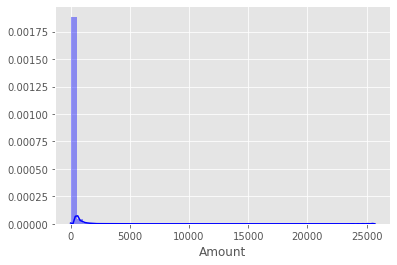

In [6]:
print("Amount Distribution of Credit Card Data")
sns.distplot(df['Amount'], color = 'blue');

Most daily transactions aren’t extremely expensive (most are < $50), but it’s likely where most fraudulent transactions are occurring as well.

### Class

In [7]:
fraud = df['Class'].value_counts()[1]
nonfraud = df['Class'].value_counts()[0]

print(f'Fraudulent:{fraud}, Non-fraudulent:{nonfraud}')
print(f'Ratio of fraud: {fraud}/{nonfraud+fraud} ({fraud / (nonfraud+fraud) * 100:.3f}%)')

Fraudulent:492, Non-fraudulent:284315
Ratio of fraud: 492/284807 (0.173%)


A quick glance at the output above, there were **492 fraud transactions of 284,807 transactions**, accounting for **0.173%**. So this project's goal is detect fraudster as much as possible.

In [8]:
df_fraud = df.loc[df['Class'] == 1]
total_amount_fraud = df_fraud['Amount'].sum()
print("Total amount of fraud transactions: $" + str(total_amount_fraud))

total_amount = df['Amount'].sum()
print('Ratio of amount of fraud transactions: ' + str(total_amount_fraud/total_amount))

Total amount of fraud transactions: $60127.97
Ratio of amount of fraud transactions: 0.002389577939953885


Amount of fraud transactions accounts for **0.24%** of total amount. However, **nearly 60,128 dollars** is not a smalle value.

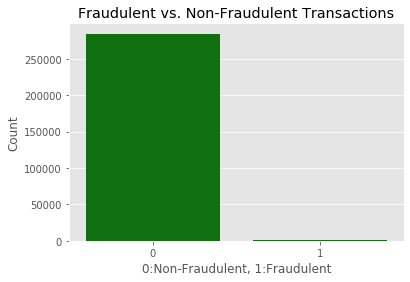

In [9]:
#fraud vs. non-fraud transactions
sns.barplot(x = df['Class'].value_counts().index, y = df['Class'].value_counts(), color = 'green')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('0:Non-Fraudulent, 1:Fraudulent');

### Finding highest correlations

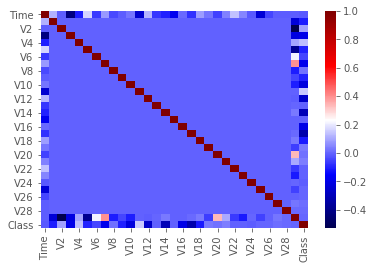

In [10]:
#heatmap to find any high correlations
sns.heatmap(data = df.corr(), cmap = "seismic", annot = False)
plt.show();

In [11]:
corre = df.corr()['Class'].abs().sort_values()
print(corre)

V22       0.000805
V23       0.002685
V25       0.003308
V15       0.004223
V26       0.004455
V13       0.004570
Amount    0.005632
V24       0.007221
V28       0.009536
Time      0.012323
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V6        0.043643
V2        0.091289
V5        0.094974
V9        0.097733
V1        0.101347
V18       0.111485
V4        0.133447
V11       0.154876
V7        0.187257
V3        0.192961
V16       0.196539
V10       0.216883
V12       0.260593
V14       0.302544
V17       0.326481
Class     1.000000
Name: Class, dtype: float64


# Source Code

## Choose attributes for training

We choose the columns based on correlation values. In this model, 10 chosen columns are Class, V17, V14, V12, V10, V16, V3, V7, V11, V4.

In [12]:
dataset = df.drop(columns = ['Class', 'V22', 'V23', 'V25', 'V15', 'V26', 'V13', 'Amount', 'V24', 'V28', 'Time', 'V27', 'V8', 'V20', 'V19', 'V21', 'V6', 'V2', 'V5', 'V9', 'V1', 'V18'])
label = df['Class']

Deviding dataset into 2 paths, namedly break and test. With break dataset, we devided into 2 path is train and validation.

The range of each attribute is difference, so we using z-score to normalize the data.

In [13]:
X_break, X_test, y_break, y_test = train_test_split(dataset, label, test_size = 0.2, 
                                                    stratify = df['Class'], random_state = 42)

X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, test_size = 0.25, 
                                                  stratify = y_break, random_state = 42)
# Initialize fit StandardScaler
std_scale = StandardScaler().fit(X_train)

# Scale data
X_train_std = std_scale.transform(X_train)
X_val_std = std_scale.transform(X_val)
X_test_std = std_scale.transform(X_test)

According to [https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html]:

`class imblearn.under_sampling.RandomUnderSampler(sampling_strategy='auto', return_indices=False, random_state=None, replacement=False, ratio=None)`: Class to perform random under-sampling. Under-sample the majority class(es) by randomly picking samples with or without replacement.


In [14]:
X_train_under, y_train_under = RandomUnderSampler(random_state = 42).fit_sample(X_train_std,y_train)
X_val_under, y_val_under = RandomUnderSampler(random_state = 42).fit_sample(X_val_std,y_val)

## Training models

### Logistic regression

**According to [https://numpy.org/doc/stable/reference/generated/numpy.logspace.html]:**

`numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)`: Return numbers spaced evenly on a log scale.


**According to [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html]:**

`class sklearn.linear_model.LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)`: Logistic Regression classifier.

*Parameters:*

- `penalty: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default='l2'`: Used to specify the norm used in the penalization. 
- `C: float, default=1.0`: Inverse of regularization strength (positive float)
- `solver: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default='lbfgs'`: Algorithm to use in the optimization problem.
- `max_iter: int, default=100`: Maximum number of iterations taken for the solvers to converge.

**According to [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html]**:

`class sklearn.model_selection.GridSearchCV(estimator, param_grid, scoring=None, n_jobs=None, cv=None, verbose=0)`: Exhaustive search over specified parameter values for an estimator.

*Parameters:*

- `estimator: estimator object.`: This is assumed to implement the scikit-learn estimator interface.
- `param_grid: dict or list of dictionaries`
- `scoring: str, callable, list/tuple or dict, default=None`: A single str or a callable to evaluate the predictions on the test set.
- `n_jobs: int, default=None`: Number of jobs to run in parallel.
- `cv: int, cross-validation generator or an iterable, default=None`: Determines the cross-validation splitting strategy.
- `verbose: integer`: Controls the verbosity: the higher, the more messages.

In [15]:
# Run CV with 5 folds (logit)

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C = C, penalty = penalty)

logistic = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv = 5, scoring = 'roc_auc', 
                             verbose = 10, n_jobs = -1)
logistic_grid.fit(X_train_under, y_train_under)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1810s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

### Naive Bayes Model

**According to [https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html]:**

`class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)`

*Parameters:*

- `priorsarray-like of shape (n_classes,)`: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
- `var_smoothingfloat, default=1e-9`: Portion of the largest variance of all features that is added to variances for calculation stability.

In [16]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train_under, y_train_under)

### Training n epochs to find best threshold

**According to [https://numpy.org/doc/stable/reference/generated/numpy.linspace.html]:**

`numpy.linspace(start, stop, num=50)`: Return evenly spaced numbers over a specified interval.

With each threshold generated from `np.linspace()` function, using validation dataset to predict and get the threshold that has the highest accuracy `acc`.

In [17]:
def find_best_threshold(model, int_num_steps):
    highest_acc = 0
    best_threshold = 0
    for threshold in np.linspace(0, 1, int_num_steps):
        y_predict = np.round(model.predict_proba(X_val_under)[:, 1] >= threshold)
        f1 = f1_score(y_val_under, y_predict)
        acc = accuracy_score(y_val_under,y_predict)
        rec = recall_score(y_val_under,y_predict)
        pre = precision_score(y_val_under,y_predict)
        
        if acc > highest_acc:
            best_threshold, best_f1, highest_acc, best_rec, best_pre = threshold, f1, acc, rec, pre
    return best_threshold, highest_acc, best_f1, best_rec, best_pre

With each model, we find the best threshold to predict the label for testing data.

In [18]:
models = [logistic_grid, gnb_model]
model_names = ["Logistic Regression", "Naive-Bayes"]
chart = list()
for item, name in zip(models, model_names):
    best_thresh, high_acc, high_f1, high_rec, high_pre = find_best_threshold(item, 20)
    chart.append([name, best_thresh, high_acc, high_f1, high_rec, high_pre])

In [19]:
chart = pd.DataFrame(chart, columns = ['Model', 'Best Threshhold','Accuracy','F1 Score','Recall','Precision'])

In [20]:
print("Correlation > 0.12")
chart

Correlation > 0.12


,Model,Best Threshhold,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.263158,0.934343,0.932642,0.909091,0.957447
1,Naive-Bayes,0.894737,0.909091,0.902174,0.838384,0.976471


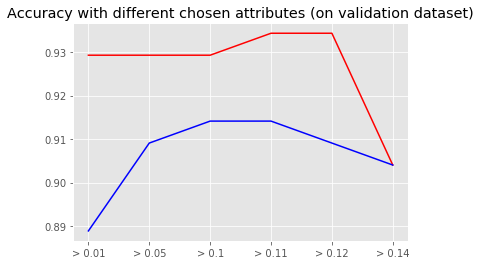

In [21]:
x = ['> 0.01', '> 0.05', '> 0.1', '> 0.11', '> 0.12', '> 0.14']
acc_lr_val = [0.929293, 0.929293, 0.929293, 0.934343, 0.934343, 0.90404]
acc_nb_val = [0.888889, 0.909091, 0.914141, 0.914141, 0.909091, 0.90404]

plt.title("Accuracy with different chosen attributes (on validation dataset)")
plt.plot(x,acc_lr_val, color = "red")
plt.plot(x,acc_nb_val, color = "blue")
plt.show()

## Testing

Predict the label (fraud/not fraud) for each model based on threshold. The default threshold is 0.5.

In [22]:
def testing_func(model, threshold = 0.5):
    y_predict = (model.predict_proba(X_test_std)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    return fraud_confusion

In [23]:
def calculate_acc(fraud_confusion):
    return (fraud_confusion[0][0] + fraud_confusion[1][1])/len(y_test)

In [24]:
def make_confusion_matrix_test(fraud_confusion):
    plt.figure(dpi = 100)
    sns.set(font_scale = 1)
    sns.heatmap(fraud_confusion, cmap = plt.cm.Blues, annot = True, square = True, fmt = 'd', xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Predicted vs. Actual');
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Accuracy of logistic regression model: 0.9393981952880868


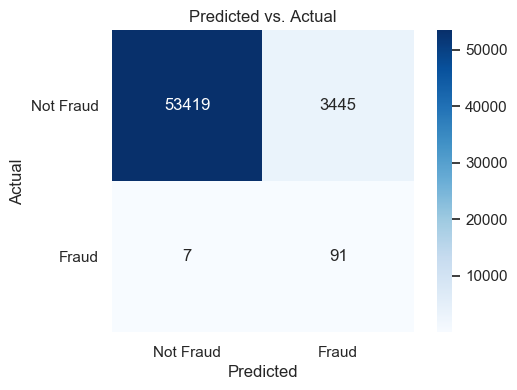

In [25]:
fraud_confusion_lr = testing_func(logistic_grid, 0.263158)
acc_lr = calculate_acc(fraud_confusion_lr)
print("Accuracy of logistic regression model: " + str(acc_lr))
make_confusion_matrix_test(fraud_confusion_lr)

Accuracy of Naive Bayes model: 0.9841999929777746


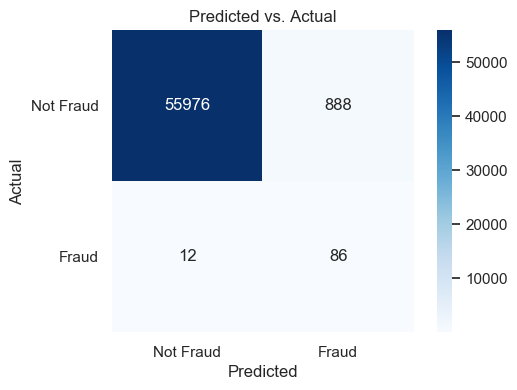

In [26]:
fraud_confusion_nb = testing_func(gnb_model, 0.894737)
acc_nb = calculate_acc(fraud_confusion_nb)
print("Accuracy of Naive Bayes model: " + str(acc_nb))
make_confusion_matrix_test(fraud_confusion_nb)

# Result

In [27]:
print('Some information for two models')
chart

Some information for two models


,Model,Best Threshhold,Accuracy,F1 Score,Recall,Precision
0,Logistic Regression,0.263158,0.934343,0.932642,0.909091,0.957447
1,Naive-Bayes,0.894737,0.909091,0.902174,0.838384,0.976471


In [28]:
print("Accuracy of logistic regression model: " + str(acc_lr))
print("Accuracy of Naive Bayes model: " + str(acc_nb))

Accuracy of logistic regression model: 0.9393981952880868
Accuracy of Naive Bayes model: 0.9841999929777746
